# Classification of car brand - CNN Deep Learning

### The car brands taken for classification : Using Transfer Learning Technique
#### BMW, Tesla and Volvo cars taken from google images

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-sizing all of the images :
#image size will be in width and height

IMAGE_SIZE = [224, 224]

In [4]:
train_path = 'zclassification of car brand data/train car'

In [5]:
test_path = 'zclassification of car brand data/test car'

#### Using resnet50 architecture

In [6]:

# Initializing resnet50
## using imagenet weight
## img size+ 3 is used here coz to make it RGB channel.

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 42s 0us/step


In [7]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [9]:
# we will be training the last layer of resnet.

for layer in resnet.layers:
    layer.trainable = False

In [11]:
## for getting no. of output categories...

folders = glob('zclassification of car brand data/train car/*')

In [12]:
folders

['zclassification of car brand data/train car\\bmw train data',
 'zclassification of car brand data/train car\\tesla train data',
 'zclassification of car brand data/train car\\volvo train data']

In [13]:

## Now, flattening resnet output

x = Flatten()(resnet.output)

In [14]:
x

<tf.Tensor 'flatten/Reshape:0' shape=(None, 100352) dtype=float32>

In [15]:

# Now, using a dense model to set the folders as output
## Using Softmax Activation Function.

prediction = Dense(len(folders), activation='softmax')(x)

### Creating Model

In [16]:
model = Model(inputs=resnet.input, outputs=prediction)

In [17]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

From above model summary, we see that the last 'dense model' has now 3 nodes.

In [18]:

## Compiling the Model :

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### doing Data Augmentation.
i.e., creating a number of new images by changing little bit in the original one

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## firstly, scaling of image 
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

#### Reading images from train and test data 

In [22]:
# using flow from directory:
training_set = train_datagen.flow_from_directory('zclassification of car brand data/train car',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

Found 30 images belonging to 3 classes.


In [23]:
test_set = test_datagen.flow_from_directory('zclassification of car brand data/test car',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

Found 24 images belonging to 3 classes.


### Fitting the Model And Training it :

In [24]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 1.5068 - accuracy: 0.3333 - val_loss: 7.7484 - val_accuracy: 0.3333
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 7.7181 - accuracy: 0.3333 - val_loss: 12.5986 - val_accuracy: 0.3333
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 12.4914 - accuracy: 0.3333 - val_loss: 6.8301 - val_accuracy: 0.3333
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 6.7148 - accuracy: 0.3333 - val_loss: 4.4597 - val_accuracy: 0.3333
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 4.4260 - accuracy: 0.3333 - val_loss: 4.6404 - val_accuracy: 0.3333
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 4.1768 - accuracy: 0.3333 - val_loss: 6.4069 - val_accuracy: 0.3333
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 5.7798 - accuracy: 0.3333 - val

Accuracy will increase as we add more images to the training list.

#### Plotting the Accuracy

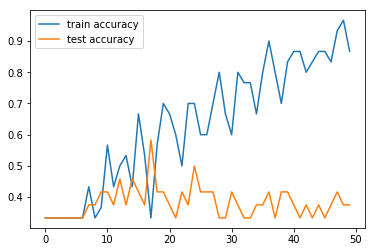

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Again, accuracy can be increased if we add more number of images

#### Plotting the Loss

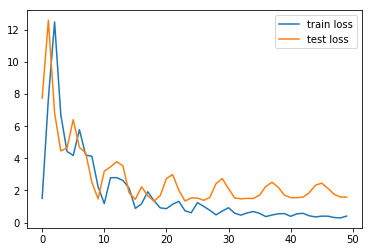

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [29]:
## Now,
## Saving the file :
from tensorflow.keras.models import load_model

model.save('model_carbrand.h5')

### Predicting ...

In [30]:
y_pred = model.predict(test_set)

In [32]:
y_pred

array([[5.9320223e-01, 2.7934921e-01, 1.2744853e-01],
       [1.2548968e-01, 8.2982499e-03, 8.6621207e-01],
       [8.5646194e-01, 1.3227843e-01, 1.1259627e-02],
       [1.5343025e-01, 7.9338926e-01, 5.3180438e-02],
       [6.7864573e-01, 1.3972390e-01, 1.8163043e-01],
       [3.5112530e-01, 1.5047808e-01, 4.9839666e-01],
       [4.8367441e-01, 4.7057560e-01, 4.5750003e-02],
       [5.8860369e-02, 6.2835938e-01, 3.1278026e-01],
       [9.8091817e-01, 7.1528913e-03, 1.1929015e-02],
       [4.8856458e-01, 9.4286919e-02, 4.1714844e-01],
       [1.4440722e-02, 7.0358127e-01, 2.8197801e-01],
       [5.8870572e-01, 9.8454542e-02, 3.1283972e-01],
       [9.5069784e-01, 4.2635914e-02, 6.6661420e-03],
       [9.9999607e-01, 2.1728563e-06, 1.7583142e-06],
       [1.8953515e-02, 2.8439334e-01, 6.9665313e-01],
       [8.7179178e-03, 2.6929808e-01, 7.2198403e-01],
       [1.4073615e-02, 1.8321003e-01, 8.0271643e-01],
       [9.9806613e-01, 8.6761499e-04, 1.0663209e-03],
       [1.5815644e-01, 1.393

Here, Probability is divided in three columns as the dataset that was given.

The first one is of BMW cars , second of Tesla and third one of Volvo cars.

In [43]:
## Reading from the Test Data prediction that which brand has the highest value :
y_pred= np.argmax(y_pred, axis=1)  
y_pred

array([0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0,
       1, 1], dtype=int64)

### Loading the Model

In [44]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [45]:
model = load_model('model_carbrand.h5')

### Reading an image for prediction :

Taking an image from the test folder of BMW i.e., array[0] and testing it if the model is doing the right prediction!

In [5]:
img = image.load_img('zclassification of car brand data/test car/bmw test data/b15.jpg',target_size=(224,224))


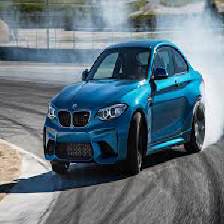

In [6]:
img

#### Converting Image to Array

In [52]:
x=image.img_to_array(img)

In [53]:
x

array([[[ 73.,  87.,  74.],
        [ 73.,  86.,  76.],
        [ 74.,  87.,  78.],
        ...,
        [121., 112.,  79.],
        [123., 114.,  81.],
        [118., 111.,  82.]],

       [[102., 116., 101.],
        [103., 117., 104.],
        [104., 117., 107.],
        ...,
        [146., 137., 108.],
        [132., 123.,  94.],
        [127., 120.,  92.]],

       [[102., 116., 101.],
        [103., 117., 104.],
        [104., 117., 107.],
        ...,
        [146., 137., 108.],
        [132., 123.,  94.],
        [127., 120.,  92.]],

       ...,

       [[161., 161., 161.],
        [161., 161., 161.],
        [161., 161., 161.],
        ...,
        [ 46.,  46.,  48.],
        [ 60.,  60.,  62.],
        [ 41.,  41.,  43.]],

       [[161., 161., 161.],
        [161., 161., 161.],
        [161., 161., 161.],
        ...,
        [ 46.,  46.,  48.],
        [ 60.,  60.,  62.],
        [ 41.,  41.,  43.]],

       [[171., 171., 171.],
        [174., 174., 174.],
        [178., 1

In [54]:
x.shape

(224, 224, 3)

In [55]:
## We will divide the img by 255 for scaling as we done before.

x=x/255

In [56]:
x

array([[[0.28627452, 0.34117648, 0.2901961 ],
        [0.28627452, 0.3372549 , 0.29803923],
        [0.2901961 , 0.34117648, 0.30588236],
        ...,
        [0.4745098 , 0.4392157 , 0.30980393],
        [0.48235294, 0.44705883, 0.31764707],
        [0.4627451 , 0.43529412, 0.32156864]],

       [[0.4       , 0.45490196, 0.39607844],
        [0.40392157, 0.45882353, 0.40784314],
        [0.40784314, 0.45882353, 0.41960785],
        ...,
        [0.57254905, 0.5372549 , 0.42352942],
        [0.5176471 , 0.48235294, 0.36862746],
        [0.49803922, 0.47058824, 0.36078432]],

       [[0.4       , 0.45490196, 0.39607844],
        [0.40392157, 0.45882353, 0.40784314],
        [0.40784314, 0.45882353, 0.41960785],
        ...,
        [0.57254905, 0.5372549 , 0.42352942],
        [0.5176471 , 0.48235294, 0.36862746],
        [0.49803922, 0.47058824, 0.36078432]],

       ...,

       [[0.6313726 , 0.6313726 , 0.6313726 ],
        [0.6313726 , 0.6313726 , 0.6313726 ],
        [0.6313726 , 0

In [57]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

### Now, predicting for this image 

In [58]:
model.predict(img_data)

array([[0.9263185 , 0.04183882, 0.03184271]], dtype=float32)

In [59]:
a=np.argmax(model.predict(img_data), axis=1)

In [60]:
a

array([0], dtype=int64)

We can see, it is predicting the array[0], which means the first column

i.e., BMW - So, the prediction is right !

In [64]:
a==0

array([ True])

In [1]:
## So, This Works !